<a href="https://colab.research.google.com/github/pili-zhangqiu/ML-Summer-School/blob/master/AICore_SC_Lesson02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting Started**
**Mounting your GDrive**

By mounting the Drive to your Python notebook, you will be able to read and manipulate files stored in your Google *Drive*.

In [13]:
# Import the function to mount the Drive
from google.colab import drive

# This line shows that we will be mounting everything stored in the main GDrive folder
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Importing libraries**

In [3]:
# Importing the pandas and Matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt


# **Reading and plotting from a CSV - 01**
The example that you will encounter in Activity 01 is a fully-numerical table. All the values of my features are numbers.

In [ ]:
# Read the CSV file and store its data content in a variable
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/AutoInsurSweden.csv')

# If I want to print or visualize the first rows of the table, I can use the head() function
print(df.head())

   number_of_claims  total_payment(thousands of Swedish Kronor)
0               108                                       392.5
1                19                                         5.2
2                13                                        15.7
3               124                                       422.2
4                40                                       119.4


0     108
1      19
2      13
3     124
4      40
     ... 
58      9
59     31
60     14
61     53
62     26
Name: number_of_claims, Length: 63, dtype: int64



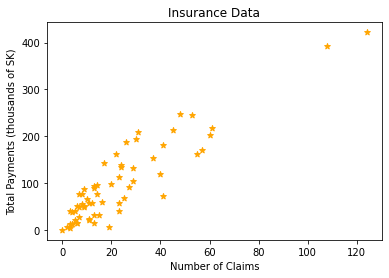

In [ ]:
# Plotting a 2D scatter graph (each data is a point) using the feature columns
print(df['number_of_claims'])
print()

# Plot
plt.scatter(df['number_of_claims'],df['total_payment(thousands of Swedish Kronor)'], marker='*', c='orange')

# Add labels
plt.xlabel('Number of Claims')
plt.ylabel('Total Payments (thousands of SK)')
plt.title('Insurance Data')
plt.show()

# **Reading and plotting from a CSV - 02**
Unlike the previous example, Activity 02 presents a CSV file containing a feature column comprised of string values. Therefore, we will have to convert these string into a sensible, equivalent numerical value.

In [ ]:
# Read the CSV file and store its data content in a variable
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/iris.csv')

# If I want to print or visualize the first rows of the table, I can use the head() function
print(df.head(20))

    sepal_length(cm)  sepal_width(cm)  ...  petal_width(cm)        class
0                5.1              3.5  ...              0.2  Iris-setosa
1                4.9              3.0  ...              0.2  Iris-setosa
2                4.7              3.2  ...              0.2  Iris-setosa
3                4.6              3.1  ...              0.2  Iris-setosa
4                5.0              3.6  ...              0.2  Iris-setosa
5                5.4              3.9  ...              0.4  Iris-setosa
6                4.6              3.4  ...              0.3  Iris-setosa
7                5.0              3.4  ...              0.2  Iris-setosa
8                4.4              2.9  ...              0.2  Iris-setosa
9                4.9              3.1  ...              0.1  Iris-setosa
10               5.4              3.7  ...              0.2  Iris-setosa
11               4.8              3.4  ...              0.2  Iris-setosa
12               4.8              3.0  ...         

In [ ]:
# To get the list of features in the CSV:
print(df.columns)

# If we look at the 'class' feature column, we will see that the values are string.
# If you want to know how many different 'class' values there are in the CSV, use the panda function unique()
print()
print(df['class'].unique())

# To get the number of 'examples' or datapoint in my CSV:
print()
print('datapoints number: ', len(df))

Index(['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)',
       'petal_width(cm)', 'class'],
      dtype='object')

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

datapoints number:  150


**Map string-based values to numbers**

In [ ]:
# Converting the string-based 'class' values to a numerical equivalent. We will be using dictionaries.
# Create the dictionaries to map the values
species_to_num = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}

num_to_species = {
    0 : 'Iris-setosa',
    1 : 'Iris-versicolor',
    2 : 'Iris-virginica'
}

# If the first known unique value of the feature 'class' is 'Iris-setosa', then we know that the values are still strings.
# If that happens, maps the string values to their numerical equivalent using dictionaries
if df['class'].unique()[0] == 'Iris-setosa':
  df['class'] = df['class'].map(species_to_num)

# Visualize
print(df.head(150))

     sepal_length(cm)  sepal_width(cm)  ...  petal_width(cm)  class
0                 5.1              3.5  ...              0.2      0
1                 4.9              3.0  ...              0.2      0
2                 4.7              3.2  ...              0.2      0
3                 4.6              3.1  ...              0.2      0
4                 5.0              3.6  ...              0.2      0
..                ...              ...  ...              ...    ...
145               6.7              3.0  ...              2.3      2
146               6.3              2.5  ...              1.9      2
147               6.5              3.0  ...              2.0      2
148               6.2              3.4  ...              2.3      2
149               5.9              3.0  ...              1.8      2

[150 rows x 5 columns]


**Plotting**

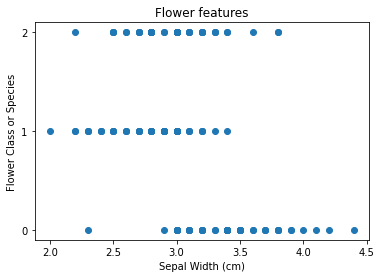

In [ ]:
# Plot the 'sepal_length' feature against the flower ‘class’
plt.scatter(df['sepal_width(cm)'], df['class'])

# Add the required labels to the graph
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Flower Class or Species')
plt.yticks(range(3))
plt.title('Flower features')
plt.show()

**Group by feature value**

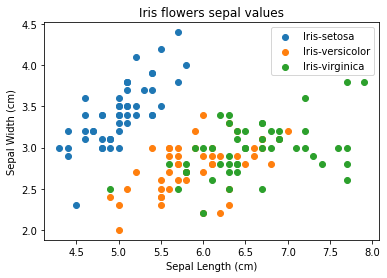

In [ ]:
# Put them in groups based on their 'class' values (aka. species name)
groups = df.groupby('class')

# 1st line: For every unique value group that I created
# 2nd line: I am gonna create a scatter plot with ‘sepal_length’ as my x-axis data and ‘sepal_width’ as my y-axis data
# In this case each group will be printed in a different loop repetition, giving them a different color
for unique_val, group in groups:
  plt.scatter(group['sepal_length(cm)'] , group['sepal_width(cm)'] , label=num_to_species[unique_val])  # label for legend


# Add labels
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris flowers sepal values')
plt.legend()  # To print the labels according to the colours
plt.show()

# **Homework**
The CSV presents a CSV file containing a feature column comprised of string values. Therefore, we will have to convert these string into a sensible, equivalent numerical value.

In [14]:
# Read the CSV file and store its data content in a variable
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/Gender_Height_Weight_2.csv')

# If I want to print or visualize the first rows of the table, I can use the head() function
print(df.head(20))

   Gender     Height      Weight
0    Male  67.749130  171.875903
1    Male  72.002520  189.386300
2    Male  72.713491  207.459682
3    Male  66.147738  183.935070
4    Male  68.376827  189.465943
5    Male  71.587216  184.457926
6    Male  70.356166  185.024508
7    Male  65.888951  159.005856
8    Male  62.525784  144.750084
9    Male  68.556281  189.036498
10   Male  69.196983  194.257748
11   Male  63.846048  161.697694
12   Male  73.143335  205.721864
13   Male  71.925106  198.674655
14   Male  69.604027  185.639511
15   Male  68.566092  180.889583
16   Male  74.040780  217.122686
17   Male  67.562913  171.266430
18   Male  73.028316  225.564077
19   Male  63.756163  158.747208


In [15]:
# To get the list of features in the CSV:
print(df.columns)

# If we look at the 'Gender' feature column, we will see that the values are string.
# If you want to know how many different 'class' values there are in the CSV, use the panda function unique()
print()
print(df['Gender'].unique())

# To get the number of 'examples' or datapoint in my CSV:
print()
print('datapoints number: ', len(df))

Index(['Gender', 'Height', 'Weight'], dtype='object')

['Male' 'Female']

datapoints number:  1231


**Map string-based values to numbers**

In [16]:
# Converting the string-based 'Gender' values to a numerical equivalent. We will be using dictionaries.
# Create the dictionaries to map the values
gender_to_num = {
    'Male' : 0,
    'Female' : 1
    }

num_to_gender = {
    0 : 'Male',
    1 : 'Female'
}

# If the first known unique value of the feature 'Gender' is 'Male', then we know that the values are still strings.
# If that happens, maps the string values to their numerical equivalent using dictionaries
if df['Gender'].unique()[0] == 'Male':
  df['Gender'] = df['Gender'].map(gender_to_num)

# Visualize
print(df.head(150))

     Gender     Height      Weight
0         0  67.749130  171.875903
1         0  72.002520  189.386300
2         0  72.713491  207.459682
3         0  66.147738  183.935070
4         0  68.376827  189.465943
..      ...        ...         ...
145       0  68.643017  181.371723
146       0  73.895315  208.037702
147       0  72.031924  198.953579
148       0  68.485214  184.657140
149       0  66.755219  141.674977

[150 rows x 3 columns]


**Plotting**

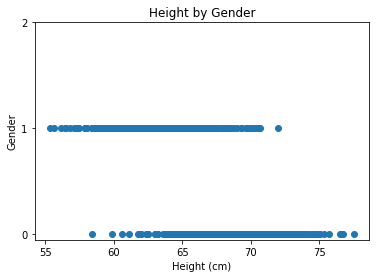

In [17]:
# Plot the 'sepal_length' feature against the flower ‘class’
plt.scatter(df['Height'], df['Gender'])

# Add the required labels to the graph
plt.xlabel('Height (cm)')
plt.ylabel('Gender')
plt.yticks(range(3))
plt.title('Height by Gender')
plt.show()

**Group by feature value**

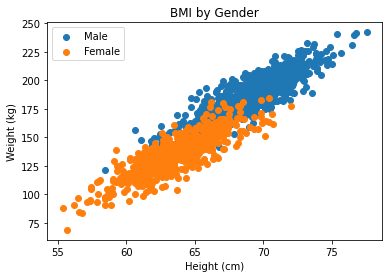

In [18]:
# Put them in groups based on their 'class' values (aka. species name)
groups = df.groupby('Gender')

# 1st line: For every unique value group that I created
# 2nd line: I am gonna create a scatter plot with ‘sepal_length’ as my x-axis data and ‘sepal_width’ as my y-axis data
# In this case each group will be printed in a different loop repetition, giving them a different color
for unique_val, group in groups:
  plt.scatter(group['Height'] , group['Weight'] , label=num_to_gender[unique_val])  # label for legend


# Add labels
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('BMI by Gender')
plt.legend()  # To print the labels according to the colours
plt.show()